#🎯 Telecom X Parte 2 - Desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

##📌 EXTRAÇÃO

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [2]:
# Ver as colunas disponíveis
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [3]:
#verificar a estrutura geral
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

Renomeando e traduzindo

In [4]:
df.rename(columns={ 'customer.gender': 'Gender', 'customer.SeniorCitizen': 'SeniorCitizen', 'customer.Partner': 'Partner', 'customer.Dependents': 'Dependents', 'customer.tenure': 'Tenure', 'phone.PhoneService': 'PhoneService', 'phone.MultipleLines': 'MultipleLines', 'internet.InternetService': 'InternetService', 'internet.OnlineSecurity': 'OnlineSecurity', 'internet.OnlineBackup': 'OnlineBackup', 'internet.DeviceProtection': 'DeviceProtection', 'internet.TechSupport': 'TechSupport', 'internet.StreamingTV': 'StreamingTV', 'internet.StreamingMovies': 'StreamingMovies', 'account.Contract': 'Contract', 'account.PaperlessBilling': 'PaperlessBilling', 'account.PaymentMethod': 'PaymentMethod', 'account.Charges.Monthly': 'MonthlyCharges', 'account.Charges.Total': 'TotalCharges', 'Total.Day': 'Total.Day' }, inplace=True)

In [5]:
df.rename(columns={
    'Gender': 'Gênero',
    'SeniorCitizen': 'Tem65AnosOuMais',
    'Partner': 'TemParceiro',
    'Dependents': 'Dependentes',
    'Tenure': 'MesesContrato',
    'PhoneService': 'ServiçoTelefone',
    'MultipleLines': 'MultiplasLinhas',
    'InternetService': 'ServiçoInternet',
    'OnlineSecurity': 'SegurançaOnline',
    'OnlineBackup': 'BackupOnline',
    'DeviceProtection': 'ProteçãoDispositivo',
    'TechSupport': 'SuporteTecnico',
    'StreamingTV': 'TVStreaming',
    'StreamingMovies': 'FilmesStreaming',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FaturaDigital',
    'PaymentMethod': 'FormaPagamento',
    'MonthlyCharges': 'CobrançaMensal',
    'TotalCharges': 'CobrançaTotal',
    'Total.Day': 'CobrançaDia'
}, inplace=True)

In [6]:
print(df.columns)

Index(['customerID', 'Churn', 'Gênero', 'Tem65AnosOuMais', 'TemParceiro',
       'Dependentes', 'MesesContrato', 'ServiçoTelefone', 'MultiplasLinhas',
       'ServiçoInternet', 'SegurançaOnline', 'BackupOnline',
       'ProteçãoDispositivo', 'SuporteTecnico', 'TVStreaming',
       'FilmesStreaming', 'TipoContrato', 'FaturaDigital', 'FormaPagamento',
       'CobrançaDia', 'CobrançaMensal', 'CobrançaTotal'],
      dtype='object')


##🛠️ Preparação dos Dados

 ✔️ Remover colunas irrelevantes

Na etapa de remoção de colunas irrelevantes, o objetivo é excluir variáveis que:


*   Não têm valor preditivo (ex: identificadores únicos).
*   São reduntantes com outras.
*   Podem causar vazamento de dados (data leakage).



In [7]:
df = df.drop(columns=['customerID'])

In [8]:
colunas_categoricas = df.select_dtypes(include='object').columns
colunas_categoricas

Index(['Churn', 'Gênero', 'TemParceiro', 'Dependentes', 'ServiçoTelefone',
       'MultiplasLinhas', 'ServiçoInternet', 'SegurançaOnline', 'BackupOnline',
       'ProteçãoDispositivo', 'SuporteTecnico', 'TVStreaming',
       'FilmesStreaming', 'TipoContrato', 'FaturaDigital', 'FormaPagamento'],
      dtype='object')

##Verificando os dados em cada coluna

In [9]:
# Verifique se há valores únicos em cada coluna
for col in df.columns:
    print(f"\n🔍 Coluna: '{col}'")
    print(f"→ Valores únicos: {df[col].nunique()}")
if df[col].nunique() < 50: # Imprima os valores somente se não houver muitos
  print("→ Valores encontrados:")
  print(df[col].unique())
  print('-' * 50)  # Linha divisória para melhor visualização


🔍 Coluna: 'Churn'
→ Valores únicos: 2

🔍 Coluna: 'Gênero'
→ Valores únicos: 2

🔍 Coluna: 'Tem65AnosOuMais'
→ Valores únicos: 2

🔍 Coluna: 'TemParceiro'
→ Valores únicos: 2

🔍 Coluna: 'Dependentes'
→ Valores únicos: 2

🔍 Coluna: 'MesesContrato'
→ Valores únicos: 73

🔍 Coluna: 'ServiçoTelefone'
→ Valores únicos: 2

🔍 Coluna: 'MultiplasLinhas'
→ Valores únicos: 3

🔍 Coluna: 'ServiçoInternet'
→ Valores únicos: 3

🔍 Coluna: 'SegurançaOnline'
→ Valores únicos: 3

🔍 Coluna: 'BackupOnline'
→ Valores únicos: 3

🔍 Coluna: 'ProteçãoDispositivo'
→ Valores únicos: 3

🔍 Coluna: 'SuporteTecnico'
→ Valores únicos: 3

🔍 Coluna: 'TVStreaming'
→ Valores únicos: 3

🔍 Coluna: 'FilmesStreaming'
→ Valores únicos: 3

🔍 Coluna: 'TipoContrato'
→ Valores únicos: 3

🔍 Coluna: 'FaturaDigital'
→ Valores únicos: 2

🔍 Coluna: 'FormaPagamento'
→ Valores únicos: 4

🔍 Coluna: 'CobrançaDia'
→ Valores únicos: 354

🔍 Coluna: 'CobrançaMensal'
→ Valores únicos: 1585

🔍 Coluna: 'CobrançaTotal'
→ Valores únicos: 6530


In [10]:
# Criar uma cópia do DataFrame original
df_clean = df.copy()

# === Etapa 1: Agrupar "Sem serviço de internet" como "Não"
cols_to_fix = [
    'SegurançaOnline', 'BackupOnline', 'ProteçãoDispositivo',
    'SuporteTecnico', 'TVStreaming', 'FilmesStreaming'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot encoding (sem dummy trap)
categorical_cols = [
    'Churn', 'Gênero', 'TemParceiro', 'Dependentes',
    'ServiçoTelefone', 'MultiplasLinhas', 'ServiçoInternet',
    'SegurançaOnline', 'BackupOnline', 'ProteçãoDispositivo',
    'SuporteTecnico', 'TVStreaming', 'FilmesStreaming',
    'TipoContrato', 'FaturaDigital', 'FormaPagamento'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Resultado final pronto para modelagem
df_encoded

,Tem65AnosOuMais,MesesContrato,CobrançaDia,CobrançaMensal,CobrançaTotal,Churn_Yes,Gênero_Male,TemParceiro_Yes,Dependentes_Yes,ServiçoTelefone_Yes,...,ProteçãoDispositivo_Yes,SuporteTecnico_Yes,TVStreaming_Yes,FilmesStreaming_Yes,TipoContrato_One year,TipoContrato_Two year,FaturaDigital_Yes,FormaPagamento_Credit card (automatic),FormaPagamento_Electronic check,FormaPagamento_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tem65AnosOuMais                         7043 non-null   int64  
 1   MesesContrato                           7043 non-null   int64  
 2   CobrançaDia                             7032 non-null   float64
 3   CobrançaMensal                          7043 non-null   float64
 4   CobrançaTotal                           7032 non-null   float64
 5   Churn_Yes                               7043 non-null   bool   
 6   Gênero_Male                             7043 non-null   bool   
 7   TemParceiro_Yes                         7043 non-null   bool   
 8   Dependentes_Yes                         7043 non-null   bool   
 9   ServiçoTelefone_Yes                     7043 non-null   bool   
 10  MultiplasLinhas_No phone service        7043 non-null   bool

✔️ Verificação novamente dos valores nulos

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tem65AnosOuMais                         7043 non-null   int64  
 1   MesesContrato                           7043 non-null   int64  
 2   CobrançaDia                             7032 non-null   float64
 3   CobrançaMensal                          7043 non-null   float64
 4   CobrançaTotal                           7032 non-null   float64
 5   Churn_Yes                               7043 non-null   bool   
 6   Gênero_Male                             7043 non-null   bool   
 7   TemParceiro_Yes                         7043 non-null   bool   
 8   Dependentes_Yes                         7043 non-null   bool   
 9   ServiçoTelefone_Yes                     7043 non-null   bool   
 10  MultiplasLinhas_No phone service        7043 non-null   bool

In [13]:
# Verifica valores nulos nas duas colunas
print(df_encoded[['CobrançaDia', 'CobrançaTotal']].isnull().sum())

CobrançaDia      11
CobrançaTotal    11
dtype: int64


### Removendo valores nulos das colunas

In [14]:
# Remove linhas com valores nulos nas colunas especificadas
df_encoded = df_encoded.dropna(subset=['CobrançaDia', 'CobrançaTotal'])

In [15]:
df_encoded.isnull().sum()

,0
Tem65AnosOuMais,0
MesesContrato,0
CobrançaDia,0
CobrançaMensal,0
CobrançaTotal,0
Churn_Yes,0
Gênero_Male,0
TemParceiro_Yes,0
Dependentes_Yes,0
ServiçoTelefone_Yes,0


###📉 Análise de Proporção de Churn
• 	Clientes ativos (False): 5163 → 73.4%
• 	Clientes que evadiram (True): 1869 → 26.6%

In [16]:
# Contagem absoluta
churn_counts = df_encoded['Churn_Yes'].value_counts()

# Proporção relativa
churn_ratio = df_encoded['Churn_Yes'].value_counts(normalize=True)

print("Contagem de clientes:")
print(churn_counts)
print("\nProporção de clientes:")
print(churn_ratio)

Contagem de clientes:
Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

Proporção de clientes:
Churn_Yes
False    0.734215
True     0.265785
Name: proportion, dtype: float64


## 📈 Análise de Correlação

## ≡ Correlação entre as variáveis

In [18]:
corr = df_encoded.corr()

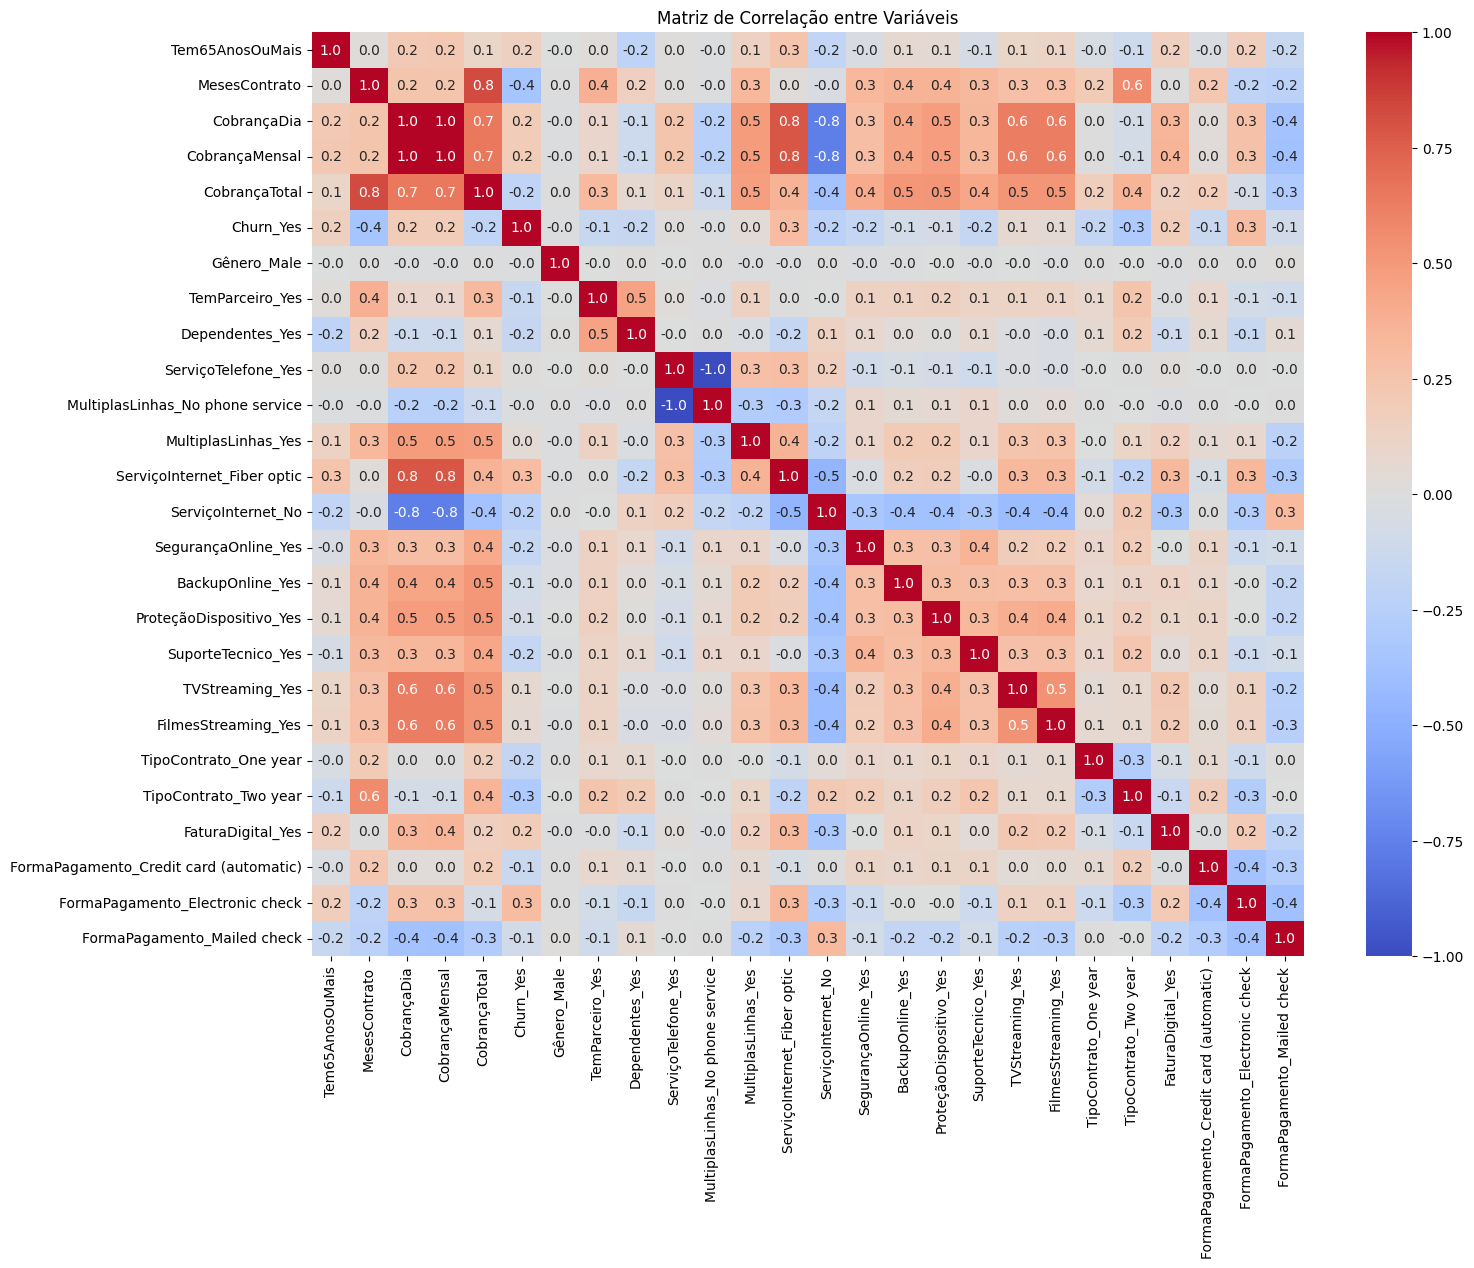

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
corr_matrix = df_encoded.corr()

# Visualiza com heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

### Correlações mais fortes com churn -> usando o limiar minimo de correlação absoluta

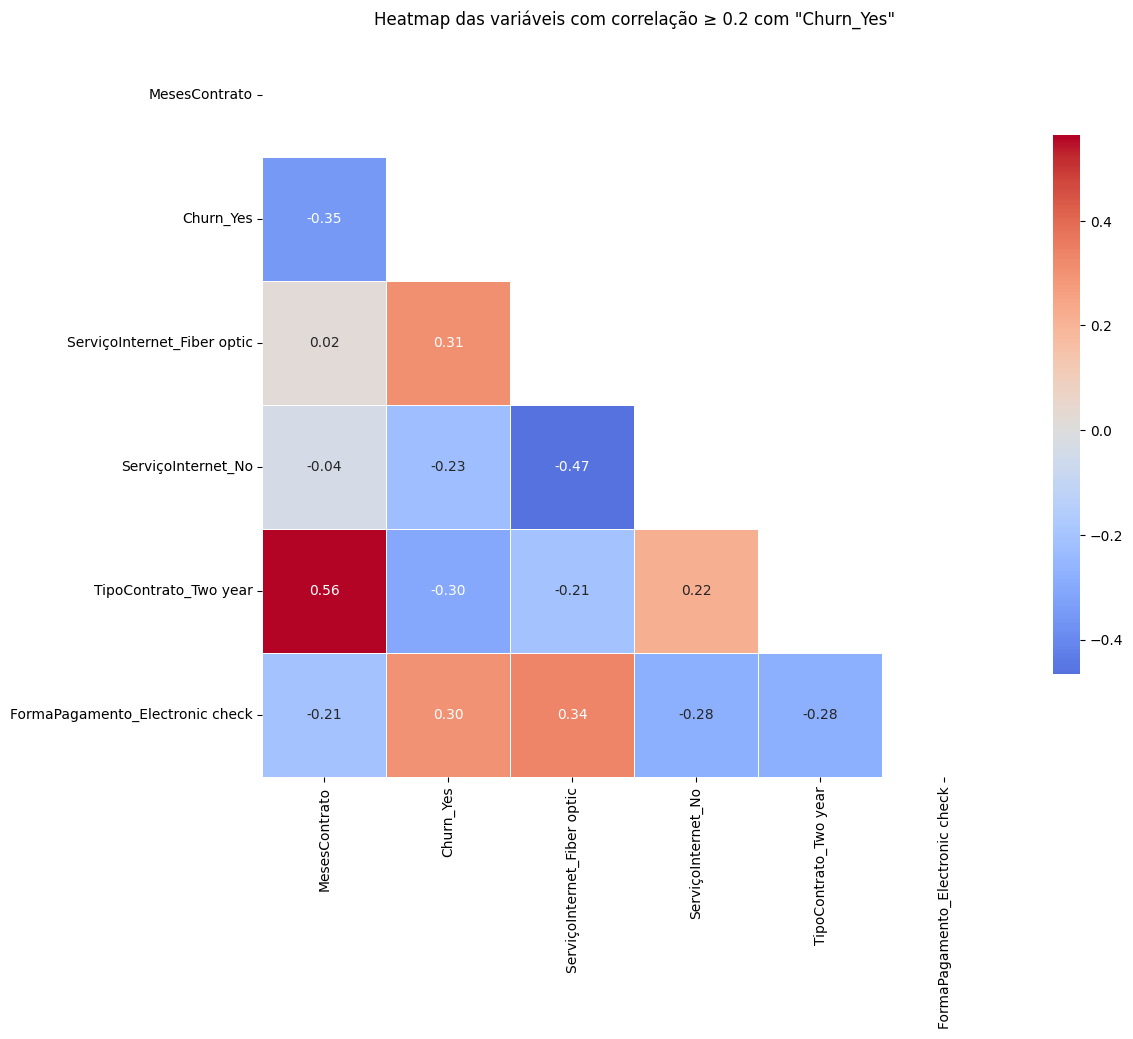

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir a variável alvo
target_var = 'Churn_Yes'

# Definir o limiar mínimo de correlação absoluta para seleção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar matriz de correlação filtrada
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar máscara para esconder triângulo superior
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação ≥ {limiar} com "{target_var}"')
plt.show()

Optou-se por utilizar um limiar de correlação de 0,2 para ampliar a sensibilidade da análise e identificar variáveis com influência moderada sobre o churn. Essa abordagem permite uma visão mais abrangente dos fatores que podem estar relacionados à evasão de clientes, mesmo que a correlação não seja forte."

“A análise de correlação revelou que variáveis como TipoContrato_Two year, FormaPagamento_Electronic check e MesesContrato apresentam correlação significativa com o churn (≥ 0.2). Isso indica que fatores relacionados à duração do contrato e forma de pagamento influenciam diretamente a evasão de clientes, sendo essenciais para a construção de modelos preditivos eficazes.




🧠 Insights Estratégicos
- Contratos longos e fidelização: MesesContrato e TipoContrato_Two year são fortes indicadores de retenção. Estratégias que incentivem contratos mais longos podem reduzir churn.
- Fibra óptica e evasão: A correlação positiva com churn sugere que clientes desse serviço podem estar insatisfeitos — vale investigar reclamações ou problemas técnicos.
- Forma de pagamento como sinal de risco: Electronic check pode ser um proxy para clientes com menor estabilidade financeira ou menor engajamento.


###Analises Direcionadas

In [ ]:
print(df_encoded['Churn_Yes'].unique())
print(df_encoded['Churn_Yes'].dtype)

[False  True]
bool


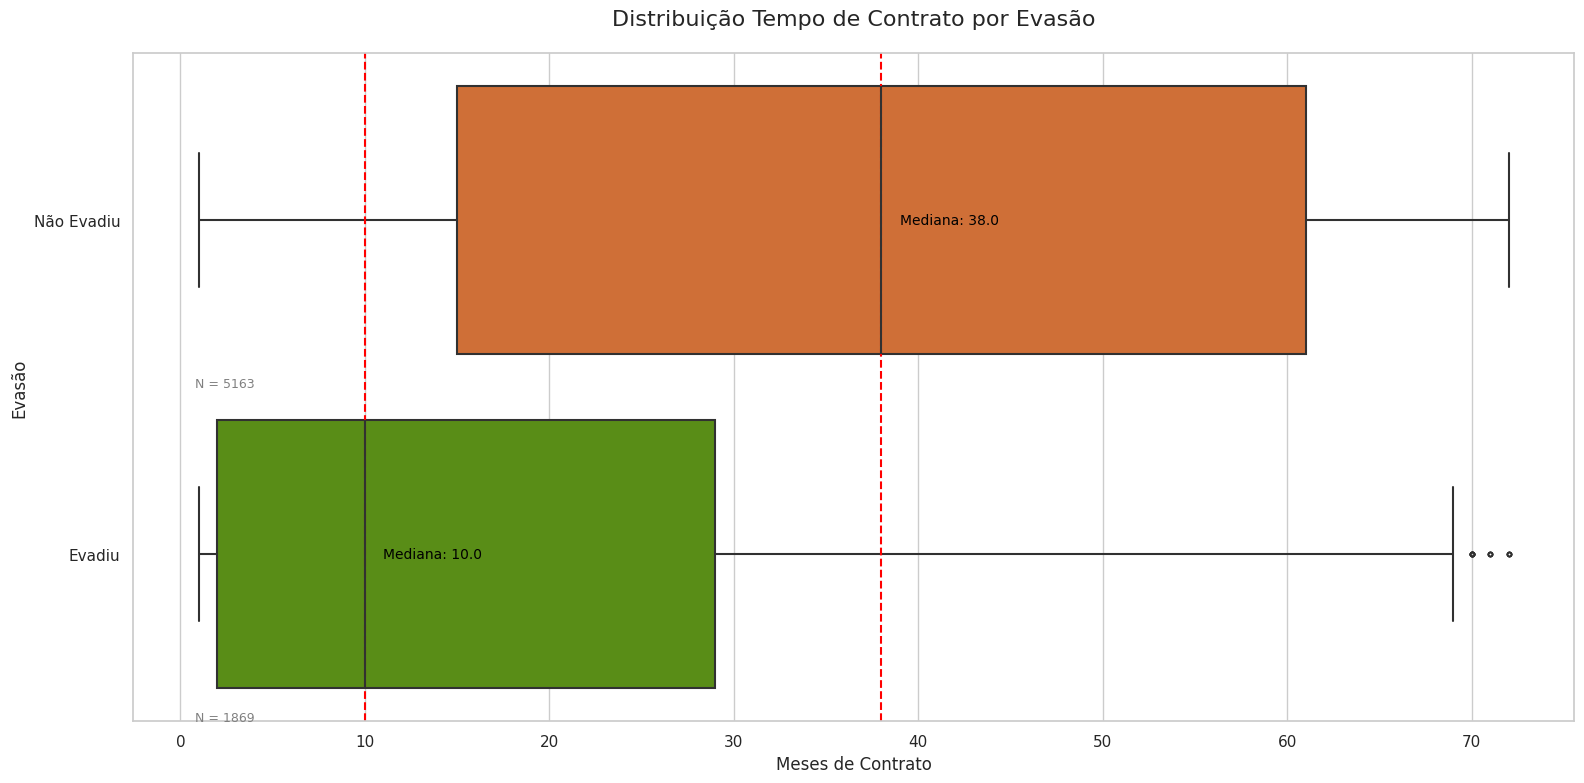

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma cópia segura
df_plot = df_encoded.copy()

# Converter 'Churn_Yes' para string
df_plot['Churn_Yes'] = df_plot['Churn_Yes'].astype(str)

# Paleta de cores
palette = {'False': "#E8681E", 'True': "#5BA004"}

# Estilo visual
sns.set(style="whitegrid")

# Criar o boxplot horizontal
plt.figure(figsize=(16, 8))
ax = sns.boxplot(
    y='Churn_Yes',
    x='MesesContrato',
    data=df_plot,
    hue='Churn_Yes',
    palette=palette,
    dodge=False,
    linewidth=1.5,
    fliersize=3
)

# Adicionar linha tracejada vermelha para a mediana de cada categoria
for i, churn_value in enumerate(['False', 'True']):
    subset = df_plot[df_plot['Churn_Yes'] == churn_value]['MesesContrato']
    median = subset.median()
    ax.axvline(x=median, color='red', linestyle='--', linewidth=1.5)
    ax.text(median + 1, i, f'Mediana: {median:.1f}', color='black', fontsize=10, va='center')

# 🔢 Adicionar número de clientes por grupo
counts = df_plot['Churn_Yes'].value_counts()
for i, churn_value in enumerate(['False', 'True']):
    ax.text(0.8, i + 0.5, f'N = {counts[churn_value]}', color='gray', fontsize=9)

# Títulos e rótulos
plt.title('Distribuição Tempo de Contrato por Evasão', fontsize=16, pad=20)
plt.ylabel('Evasão', fontsize=12)
plt.xlabel('Meses de Contrato', fontsize=12)
plt.yticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

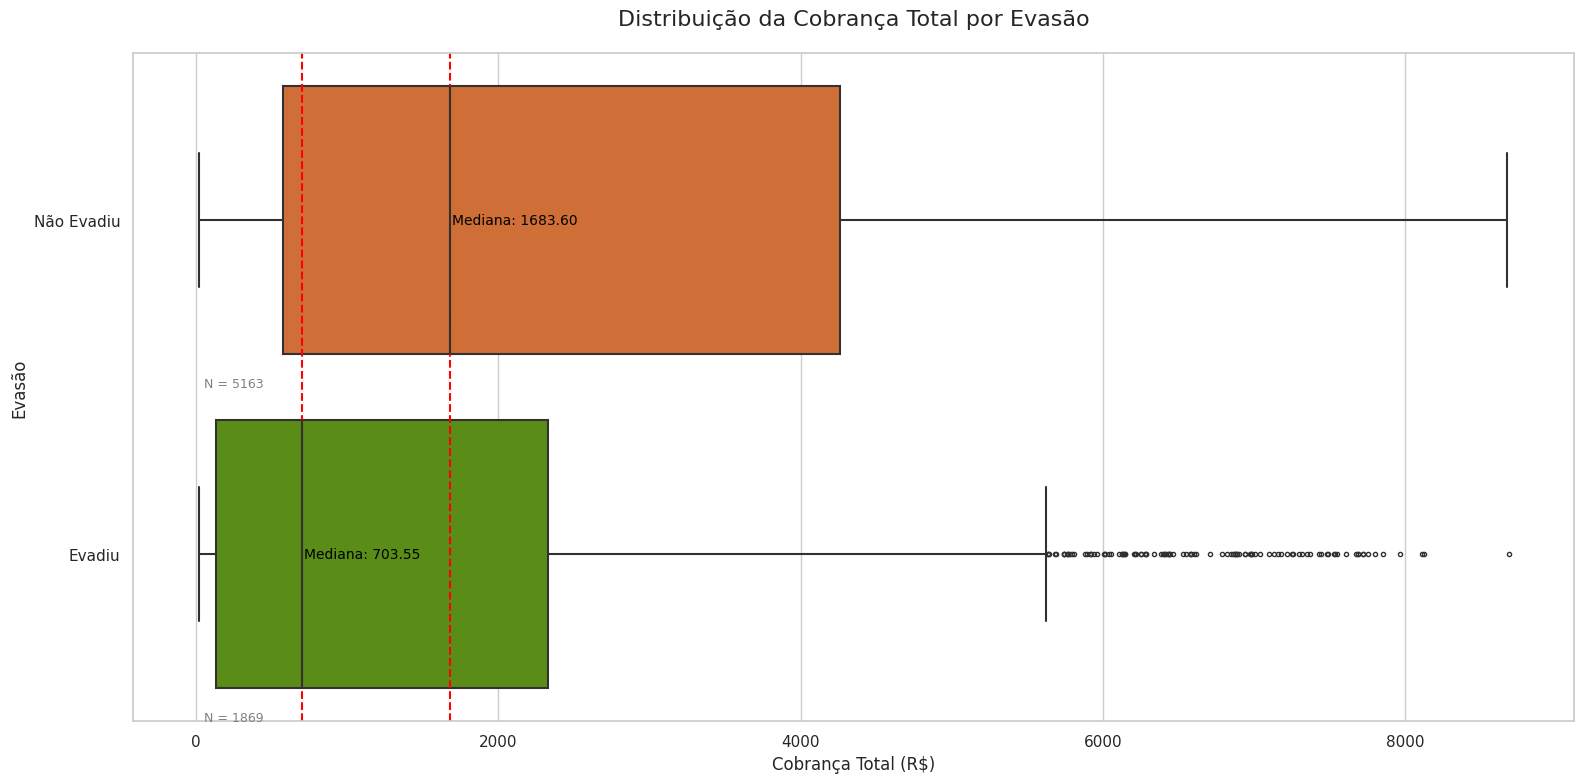

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma cópia segura
df_plot = df_encoded.copy()

# Converter 'Churn_Yes' para string
df_plot['Churn_Yes'] = df_plot['Churn_Yes'].astype(str)

# Paleta de cores
palette = {'False': "#E8681E", 'True': "#5BA004"}

# Estilo visual
sns.set(style="whitegrid")

# Criar o boxplot horizontal
plt.figure(figsize=(16, 8))
ax = sns.boxplot(
    y='Churn_Yes',
    x='CobrançaTotal',
    data=df_plot,
    hue='Churn_Yes',
    palette=palette,
    dodge=False,
    linewidth=1.5,
    fliersize=3
)

# Adicionar linha tracejada vermelha para a mediana de cada categoria
for i, churn_value in enumerate(['False', 'True']):
    subset = df_plot[df_plot['Churn_Yes'] == churn_value]['CobrançaTotal']
    median = subset.median()
    ax.axvline(x=median, color='red', linestyle='--', linewidth=1.5)
    ax.text(median + 10, i, f'Mediana: {median:.2f}', color='black', fontsize=10, va='center')

# Adicionar número de clientes por grupo
counts = df_plot['Churn_Yes'].value_counts()
for i, churn_value in enumerate(['False', 'True']):
    ax.text(50, i + 0.5, f'N = {counts[churn_value]}', color='gray', fontsize=9)

# Títulos e rótulos
plt.title('Distribuição da Cobrança Total por Evasão', fontsize=16, pad=20)
plt.ylabel('Evasão', fontsize=12)
plt.xlabel('Cobrança Total (R$)', fontsize=12)
plt.yticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

## 🤖 Modelos Preditivos

Importação da bibliotecas

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

 Separar features e target

In [41]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

Dividir treino e teste

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Normalizar**

- Vamos treinar Regressão Logística, que se beneficia da normalização. Por isso, normalizei os dados para esse modelo.

- Já o Random Forest não precisa da normalização — mas como você está usando os mesmos dados para ambos os modelos, o normalizei para manter consistência e simplicidade.

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear treino com SMOTE**

Pois ja verificamos anterioemente que a proporção do churn estava desbalanceada

In [44]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regressão Logística**

In [45]:
# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print(" 🔹Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


 🔹Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



📈 Resumo da performance – Regressão Logística

| Métrica | Valor | Interpretação |
| Acurácia | 0.75 | O modelo acertou 75% das previsões totais |
| ROC AUC | 0.85 | Excelente capacidade de distinguir entre clientes que evadem e os que não |
| Precision (True) | 0.52 | Quando o modelo prevê evasão, acerta 52% das vezes |
| Recall (True) | 0.81 | O modelo identifica 81% dos clientes que realmente evadem |
| F1-score (True) | 0.63 | Equilíbrio entre precisão e recall para a classe de churn |






Insights da matriz de confusão
• 	Falsos negativos (107): clientes que evadiram mas o modelo não previu
• 	Falsos positivos (420): clientes que não evadiram mas o modelo previu como evasão
• 	O modelo priorizou recall para churn — ótimo se o objetivo é antecipar risco e agir preventivamente

##Gráfico de Precision vs Recall por Threshold - Verificar como a precisão e recall variam com o threshold e com base no grafico o intervalo entre 0.65 e 0.70 parece ser um ótimo ponto de equilíbrio


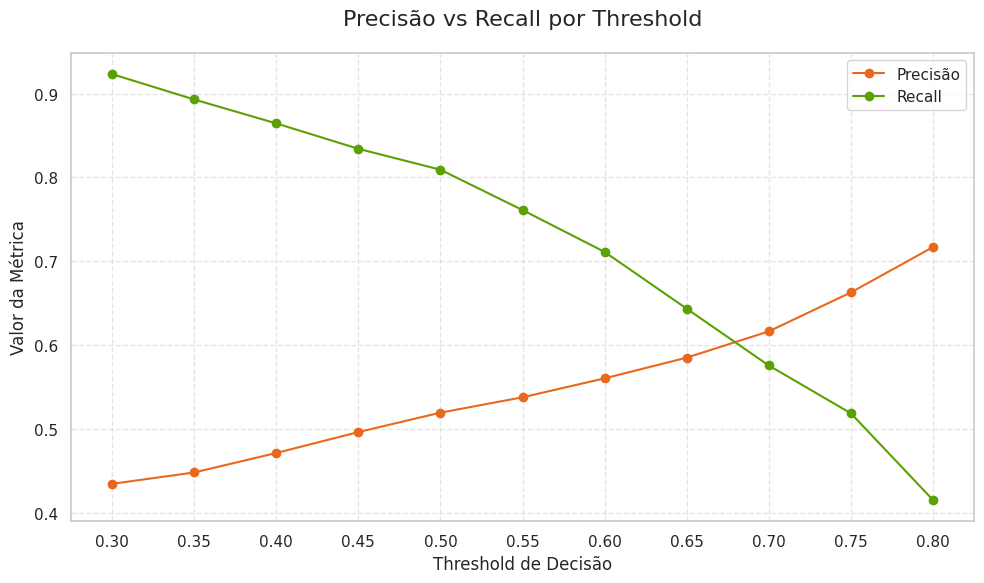

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Lista de thresholds para testar
thresholds = np.arange(0.3, 0.81, 0.05)

# Listas para armazenar os resultados
precisions = []
recalls = []

# Calcular precisão e recall para cada threshold
for t in thresholds:
    y_pred_t = np.where(y_prob_lr >= t, 1, 0)
    precisions.append(precision_score(y_test, y_pred_t))
    recalls.append(recall_score(y_test, y_pred_t))

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precisão', marker='o', color='#E8681E')
plt.plot(thresholds, recalls, label='Recall', marker='o', color='#5BA004')

# Destaques visuais
plt.title('Precisão vs Recall por Threshold', fontsize=16, pad=20)
plt.xlabel('Threshold de Decisão', fontsize=12)
plt.ylabel('Valor da Métrica', fontsize=12)
plt.xticks(thresholds)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Testar ambos os thresholds e comparar os resultados

In [54]:
# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print(" 🔹Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


# 🎯 Avaliação com thresholds ajustados
for threshold in [0.65, 0.70]:
    y_pred_custom = (y_prob_lr >= threshold).astype(int)
    print(f"\n🔍 Threshold ajustado: {threshold}")
    print("Precisão:", precision_score(y_test, y_pred_custom))
    print("Recall:", recall_score(y_test, y_pred_custom))
    print("F1 Score:", f1_score(y_test, y_pred_custom))

 🔹Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110


🔍 Threshold ajustado: 0.65
Precisão: 0.5850891410048622
Recall: 0.64349376114082
F1 Score: 0.6129032258064516

🔍 Threshold ajustado: 0.7
Precisão: 0.6164122137404581
Recall: 0.5757575757575758
F1 Score: 0.5953917050691244


**Random Forest**

In [55]:
# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

for threshold in [0.65, 0.70]:
    y_pred_custom = (y_prob_rf >= threshold).astype(int)
    print(f"\n🔍 Threshold ajustado: {threshold}")
    print("Precisão:", precision_score(y_test, y_pred_custom))
    print("Recall:", recall_score(y_test, y_pred_custom))
    print("F1 Score:", f1_score(y_test, y_pred_custom))


Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusão:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110


🔍 Threshold ajustado: 0.65
Precisão: 0.6387434554973822
Recall: 0.43493761140819964
F1 Score: 0.5174973488865323

🔍 Threshold ajustado: 0.7
Precisão: 0.6741935483870968
Recall: 0.37254901960784315
F1 Score: 0.4799081515499426


In [53]:
# Instanciar e treinar o XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_xgb = xgb.predict(X_test_scaled)  # Previsão com threshold padrão (0.5)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de churn
# 📊 Avaliação padrão
print("🔹 XGBoost (threshold padrão 0.5)")
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# 🎯 Avaliação com thresholds ajustados
for threshold in [0.65, 0.70]:
    y_pred_custom = (y_prob_xgb >= threshold).astype(int)
    print(f"\n🔍 Threshold ajustado: {threshold}")
    print("Precisão:", precision_score(y_test, y_pred_custom))
    print("Recall:", recall_score(y_test, y_pred_custom))
    print("F1 Score:", f1_score(y_test, y_pred_custom))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:32:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost (threshold padrão 0.5)
Acurácia: 0.7758293838862559
ROC AUC: 0.8144412645039235
Matriz de Confusão:
 [[1309  240]
 [ 233  328]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1549
        True       0.58      0.58      0.58       561

    accuracy                           0.78      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110


🔍 Threshold ajustado: 0.65
Precisão: 0.6231155778894473
Recall: 0.44206773618538325
F1 Score: 0.5172054223149114

🔍 Threshold ajustado: 0.7
Precisão: 0.6355685131195336
Recall: 0.38859180035650626
F1 Score: 0.4823008849557522


###Avaliação dos Modelos

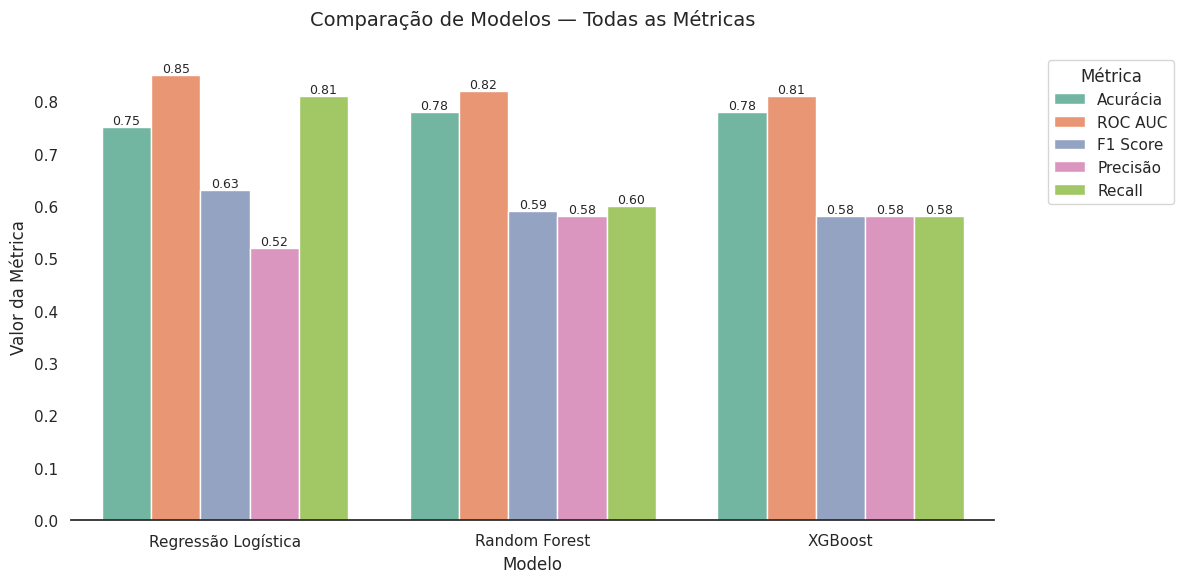

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 ETAPA 1: Dados reais das métricas
dados = {
    'Modelo': ['Regressão Logística', 'Random Forest', 'XGBoost'],
    'Acurácia': [0.75, 0.78, 0.78],
    'ROC AUC': [0.85, 0.82, 0.81],
    'F1 Score': [0.63, 0.59, 0.58],
    'Precisão': [0.52, 0.58, 0.58],
    'Recall': [0.81, 0.60, 0.58]
}

# 🔧 ETAPA 2: Criação do DataFrame
df = pd.DataFrame(dados)

# 🔧 ETAPA 3: Transformação para formato longo
df_long = pd.melt(df, id_vars='Modelo', var_name='Métrica', value_name='Valor')

# 🔧 ETAPA 4: Estilo do gráfico
sns.set(style="white")  # estilo sem grid

# 🔧 ETAPA 5: Criação do gráfico
plt.figure(figsize=(12, 6))
grafico = sns.barplot(data=df_long, x='Modelo', y='Valor', hue='Métrica', palette='Set2')

# 🔧 ETAPA 6: Adiciona rótulos nas barras
for container in grafico.containers:
    grafico.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

# 🔧 ETAPA 7: Personalização
plt.title('Comparação de Modelos — Todas as Métricas', fontsize=14, pad=20)
plt.ylabel('Valor da Métrica')
plt.xlabel('Modelo')

# 🔧 ETAPA 8: Ajuste da legenda
plt.legend(title='Métrica', bbox_to_anchor=(1.05, 1), loc='upper left')

# 🔧 ETAPA 9: Remoção das bordas e linha da esquerda
sns.despine(left=True)  # remove bordas superior, direita e esquerda

# 🔧 ETAPA 10: Remoção ou suavização da grade
grafico.grid(False)  # remove todas as linhas de grade

plt.tight_layout()
plt.show()

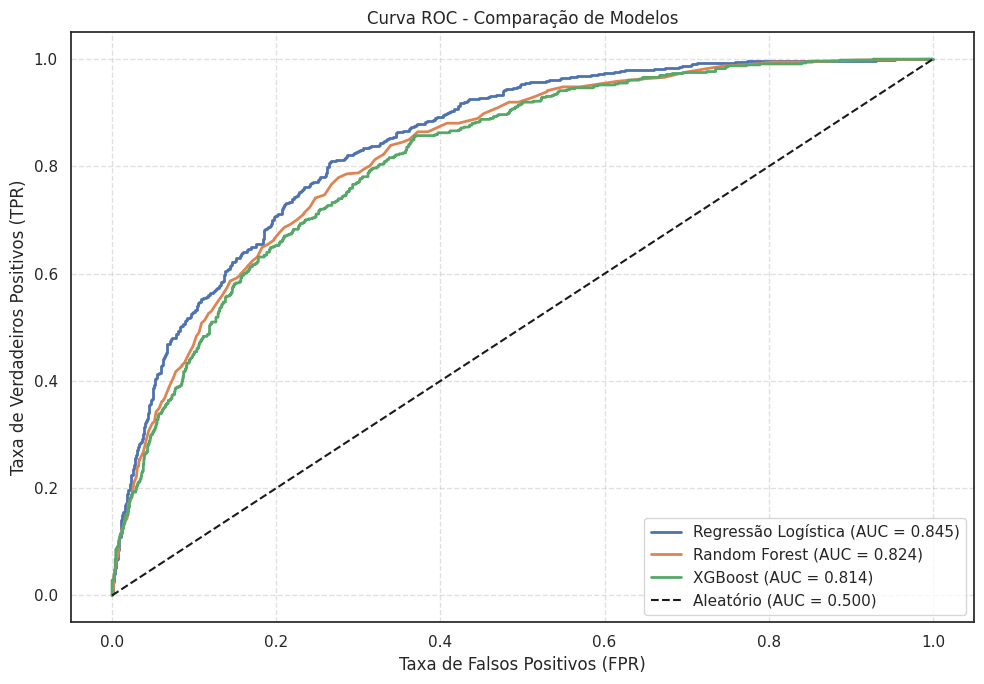

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dicionário com os nomes dos modelos e suas probabilidades
modelos_probabilidades = {
    'Regressão Logística': y_prob_lr,
    'Random Forest': y_prob_rf,
    'XGBoost': y_prob_xgb
}

# 🎨 Estilo do gráfico
plt.figure(figsize=(10, 7))
for nome, y_score in modelos_probabilidades.items():
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=f'{nome} (AUC = {roc_auc:.3f})')

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.500)')

# 🔧 Ajustes visuais
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Comparação de Modelos')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###Diagnóstico de Overfitting e Underfitting

In [65]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import pandas as pd

# 🔧 Seus modelos treinados
modelos = {
    'Regressão Logística': lr,
    'Random Forest': rf,
    'XGBoost': xgb
}

# 🔧 Seus dados
X_train = X_train_bal
y_train = y_train_bal
# Certifique-se de que X_test e y_test estão definidos corretamente

# 📊 Armazena os resultados
resultados = []

for nome, modelo in modelos.items():
    # Previsões
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    # Métricas
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_train = roc_auc_score(y_train, modelo.predict_proba(X_train)[:, 1])
    roc_test = roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1])

    # Validação cruzada
    cv_score = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy').mean()

    # Armazena
    resultados.append({
        'Modelo': nome,
        'Acurácia Treino': acc_train,
        'Acurácia Teste': acc_test,
        'F1 Treino': f1_train,
        'F1 Teste': f1_test,
        'ROC AUC Treino': roc_train,
        'ROC AUC Teste': roc_test,
        'CV Acurácia': cv_score
    })

# 📋 Exibe os resultados
df_resultados = pd.DataFrame(resultados)
print(df_resultados.round(3))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:06:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgb

                Modelo  Acurácia Treino  Acurácia Teste  F1 Treino  F1 Teste  \
0  Regressão Logística            0.782           0.272      0.790     0.418   
1        Random Forest            0.999           0.266      0.999     0.420   
2              XGBoost            0.956           0.266      0.957     0.420   

   ROC AUC Treino  ROC AUC Teste  CV Acurácia  
0           0.861          0.413        0.779  
1           1.000          0.483        0.854  
2           0.993          0.498        0.843  


Todos os modelos estão sofrendo de overfitting, com desempenho muito superior no treino em relação ao teste. Isso indica que o modelo está aprendendo padrões específicos demais, e não está generalizando bem

#📋  Interpretação e Conclusões

###Analise da Importancia das variaveis
1. Regressão Logística

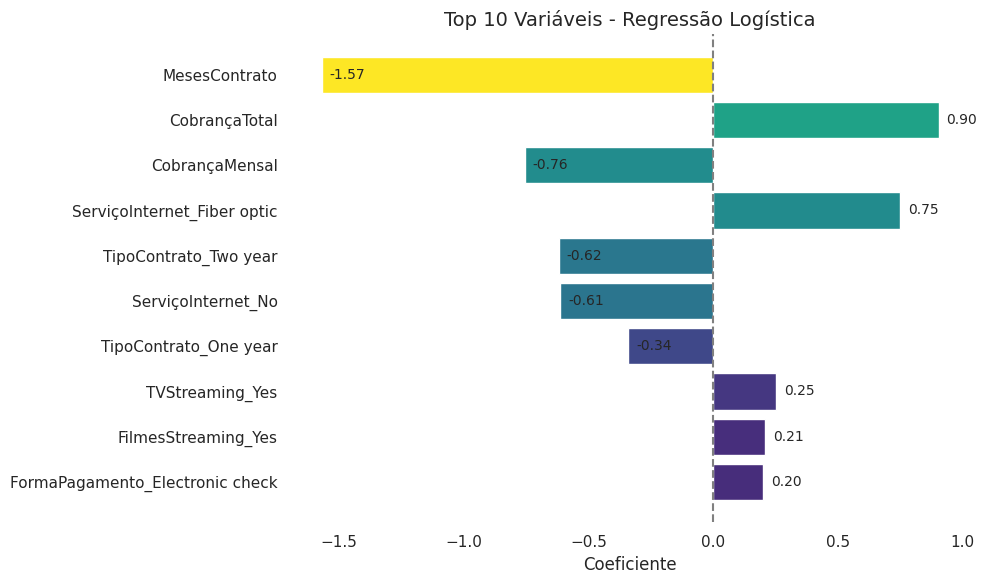

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Balanceamento com SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Treinamento da Regressão Logística
model = LogisticRegression()
model.fit(X_train_bal, y_train_bal)

# Coeficientes
coef = model.coef_[0]
features = X.columns

# DataFrame com os coeficientes
df_coef = pd.DataFrame({'Variável': features, 'Coeficiente': coef})
df_coef['Importância Absoluta'] = df_coef['Coeficiente'].abs()
df_top10 = df_coef.sort_values(by='Importância Absoluta', ascending=False).head(10)

# Gráfico estilizado
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_top10['Variável'],
    df_top10['Coeficiente'],
    color=plt.cm.viridis(df_top10['Importância Absoluta'] / df_top10['Importância Absoluta'].max())
)

# Linha central tracejada
plt.axvline(0, color='gray', linestyle='dashed')

# Adiciona os valores ao final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.02 * df_top10['Coeficiente'].abs().max(),
        bar.get_y() + bar.get_height() / 2,
        f'{width:.2f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Título e eixos
plt.title('Top 10 Variáveis - Regressão Logística', fontsize=14)
plt.xlabel('Coeficiente', fontsize=12)
plt.gca().invert_yaxis()

# Remover bordas da caixa
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Remover linhas de fundo (grade)
plt.grid(False)

plt.tight_layout()
plt.show()


2: Random Forest

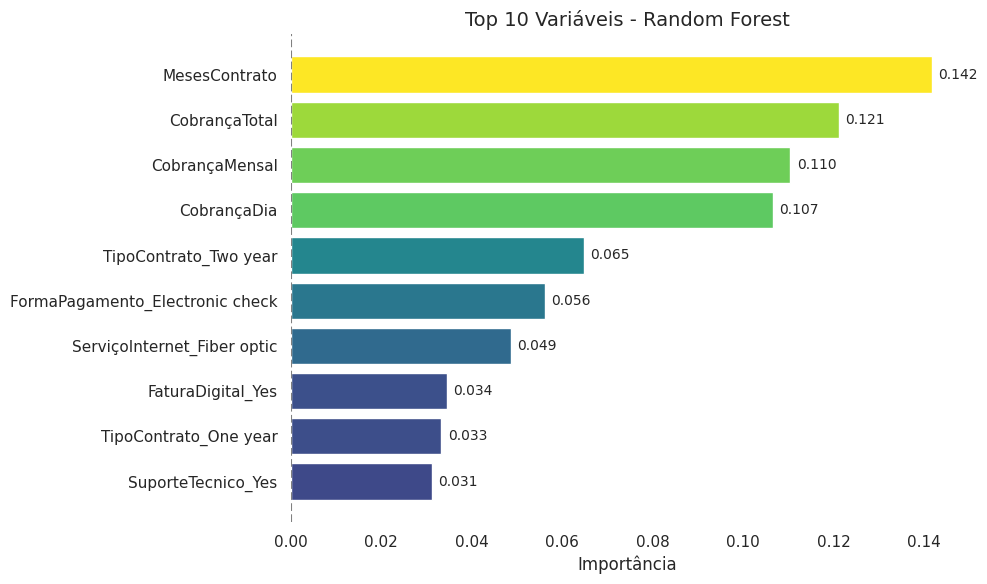

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Treinamento do modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

# Extração da importância
importancias = rf_model.feature_importances_
features = X.columns

# DataFrame com as 10 mais importantes
df_rf = pd.DataFrame({'Variável': features, 'Importância': importancias})
df_rf_top10 = df_rf.sort_values(by='Importância', ascending=False).head(10)

# Gráfico
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_rf_top10['Variável'],
    df_rf_top10['Importância'],
    color=plt.cm.viridis(df_rf_top10['Importância'] / df_rf_top10['Importância'].max())
)
plt.axvline(0, color='gray', linestyle='dashed')

# Adiciona os valores ao final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.01 * df_rf_top10['Importância'].max(),
        bar.get_y() + bar.get_height() / 2,
        f'{width:.3f}',
        va='center',
        ha='left',
        fontsize=10
    )

plt.title('Top 10 Variáveis - Random Forest', fontsize=14)
plt.xlabel('Importância', fontsize=12)
plt.gca().invert_yaxis()

# Remover bordas e grade
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid(False)

plt.tight_layout()
plt.show()

3. XGBoost (Gain)

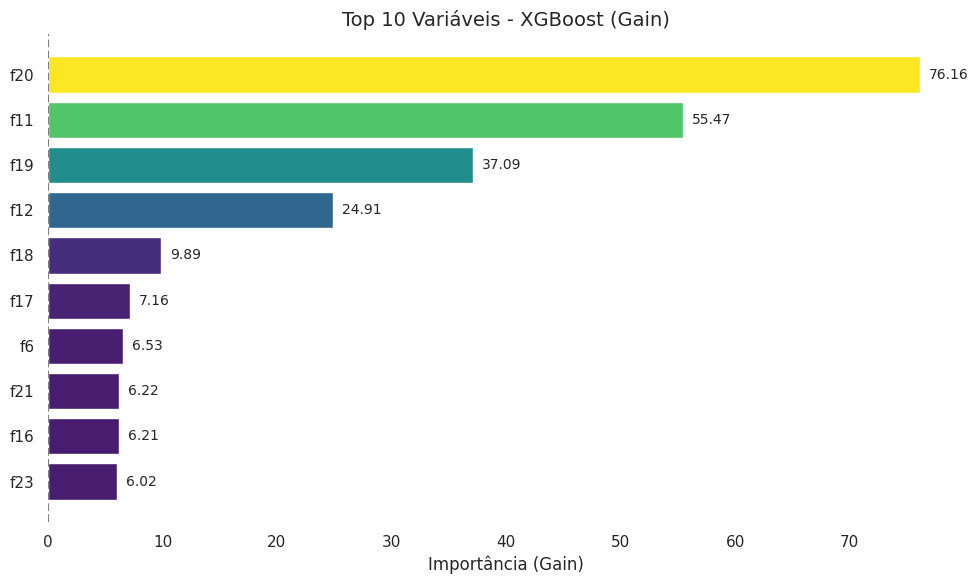

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extrair importância das variáveis por 'gain'
importancia_dict = xgb.get_booster().get_score(importance_type='gain')

# Organizar em DataFrame
df_xgb = pd.DataFrame({
    'Variável': list(importancia_dict.keys()),
    'Importância': list(importancia_dict.values())
})
df_xgb_top10 = df_xgb.sort_values(by='Importância', ascending=False).head(10)

# Gráfico estilizado
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_xgb_top10['Variável'],
    df_xgb_top10['Importância'],
    color=plt.cm.viridis(np.array(df_xgb_top10['Importância']) / max(df_xgb_top10['Importância']))
)
plt.axvline(0, color='gray', linestyle='dashed')

# Adiciona os valores ao final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.01 * max(df_xgb_top10['Importância']),
        bar.get_y() + bar.get_height() / 2,
        f'{width:.2f}',
        va='center',
        ha='left',
        fontsize=10
    )

# Título e eixos
plt.title('Top 10 Variáveis - XGBoost (Gain)', fontsize=14)
plt.xlabel('Importância (Gain)', fontsize=12)
plt.gca().invert_yaxis()

# Remover bordas e grade
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid(False)

plt.tight_layout()
plt.show()

###Comparação de Modelos com Base em Recall e AUC aplicadas a nossa realidade de churn- Escolha do Modelo de Regressão Logistica

In [80]:
import pandas as pd

# Criar tabela comparativa
resultados = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest', 'XGBoost'],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'AUC': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb)
    ]
})

# Ordenar por Recall e AUC
resultados['Ranking'] = resultados[['Recall', 'AUC']].rank(method='min', ascending=False).mean(axis=1)
resultados = resultados.sort_values(by='Ranking')

print(resultados)

                Modelo    Recall       AUC  Ranking
0  Regressão Logística  0.809269  0.845363      1.0
1        Random Forest  0.598930  0.824159      2.0
2              XGBoost  0.584670  0.814441      3.0


###Salvando o Modelo de regressao logística

In [85]:
import pickle

# Salvar o modelo treinado
with open('modelo_regressao_logistica.pkl', 'wb') as arquivo:
    pickle.dump(lr, arquivo)

In [86]:
# Carregar o modelo salvo
with open('modelo_regressao_logistica.pkl', 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

## 📄 Relatório Analítico — Predição de Evasão de Clientes

Este relatório apresenta os resultados de uma análise preditiva conduzida com o objetivo de identificar os principais fatores que influenciam a evasão de clientes da empresa **Telecom X**. Diante da necessidade de antecipar esse fenômeno e propor estratégias eficazes de retenção, foi realizada uma preparação rigorosa dos dados, incluindo etapas de tratamento, codificação de variáveis categóricas (encoding) e normalização.

Na sequência, aplicamos técnicas de análise de correlação e seleção de variáveis para garantir a relevância dos atributos utilizados na modelagem. Foram treinados três algoritmos de classificação — **Regressão Logística**, **Random Forest** e **XGBoost** — com o intuito de comparar o desempenho preditivo e extrair insights sobre os fatores mais determinantes para o churn.

---

## 🔍 Principais Fatores que Influenciam a Evasão

A análise dos três modelos revelou um conjunto consistente de variáveis que se destacam como os principais preditores de evasão:

- **Tempo de contrato**: Clientes com contratos mais longos apresentam menor propensão à evasão. Esse fator foi o mais influente em todos os modelos.
- **Valores cobrados (total e mensal)**: Cobranças elevadas estão associadas a maior risco de churn, especialmente quando não há percepção clara de valor agregado.
- **Tipo de contrato**: Contratos de dois anos demonstram forte efeito de retenção, enquanto contratos mensais ou anuais estão mais associados à evasão.
- **Forma de pagamento (Electronic check)**: Clientes que utilizam débito eletrônico tendem a apresentar maior risco de saída, possivelmente por menor vínculo com a empresa.
- **Serviço de internet (Fiber optic)**: Apesar de ser um serviço de maior qualidade, clientes com fibra óptica mostraram maior propensão à evasão, sugerindo possíveis problemas de experiência ou atendimento.

A convergência desses fatores entre os três modelos reforça sua relevância e consistência como indicadores de risco.

Fig 1- Headmap das variáveis com correlação limiar ≥ 0.2
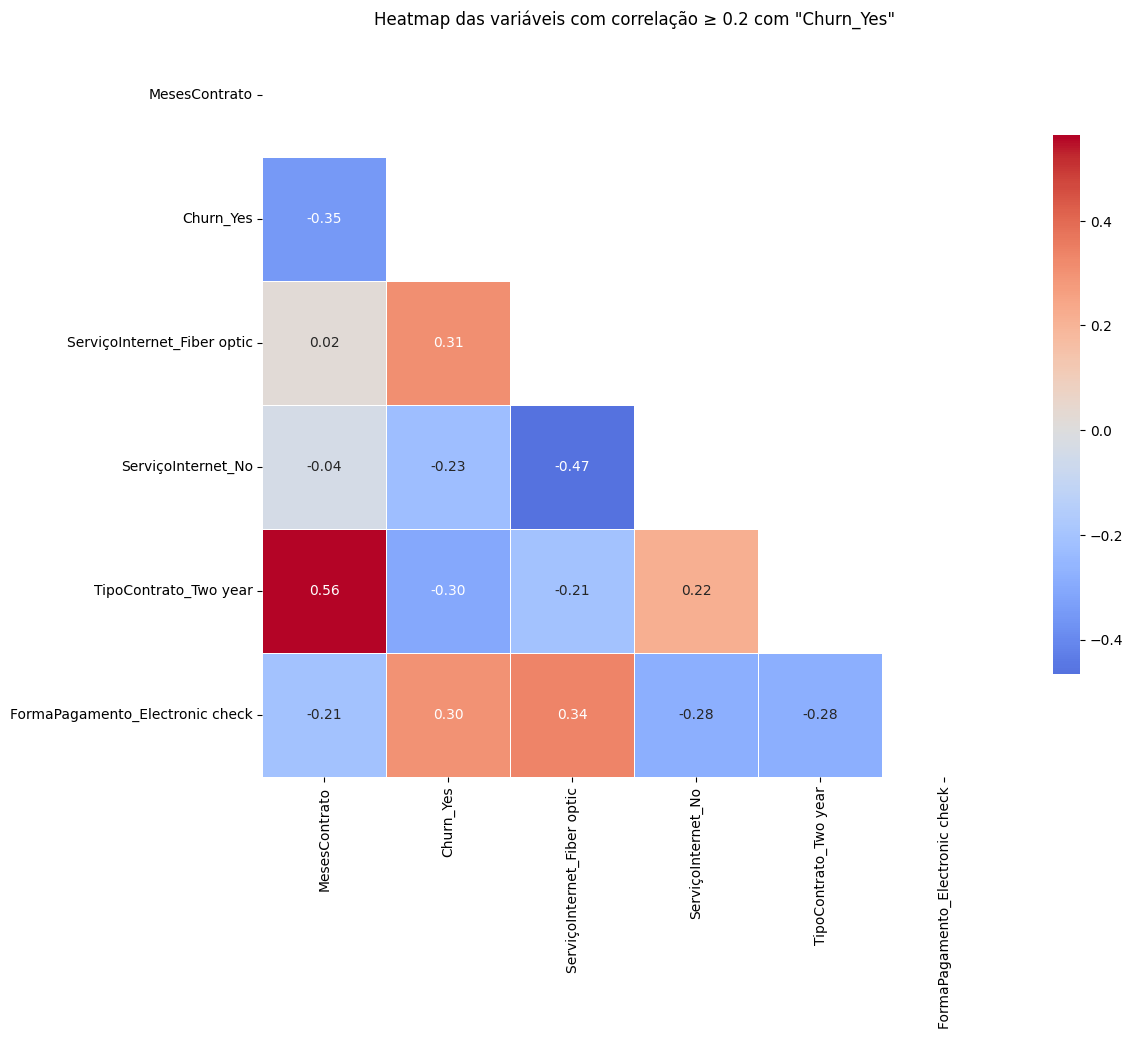
---

## 📊 Desempenho dos Modelos Preditivos

A avaliação dos modelos foi realizada com base nas métricas **Accuracy**, **ROC AUC**, **F1 Score**, **Precision** e **Recall**. A seguir, um resumo interpretativo dos resultados:

- **Regressão Logística**: Destacou-se em **ROC AUC (0.85)** e **Recall (0.81)**, demonstrando excelente capacidade de identificar clientes em risco. Embora sua precisão (0.52) seja mais baixa, o modelo é ideal quando o objetivo é **detecção ampla**, mesmo com alguns falsos positivos.
  
- **Random Forest**: Apresentou **Accuracy de 0.78** e equilíbrio entre **Precision (0.58)** e **Recall (0.60)**. É um modelo mais conservador, que evita excessos, mas pode deixar passar alguns casos de churn. Indicado quando se busca **estabilidade entre acertos e erros**.

- **XGBoost**: Teve desempenho semelhante ao Random Forest em todas as métricas, com destaque para sua **robustez e confiabilidade**, embora sem se sobressair em nenhuma métrica específica. É uma boa opção quando se deseja um modelo com **potencial de otimização avançada**.

Fig 2- Curva ROC AUC comparação entre os 3 modelos
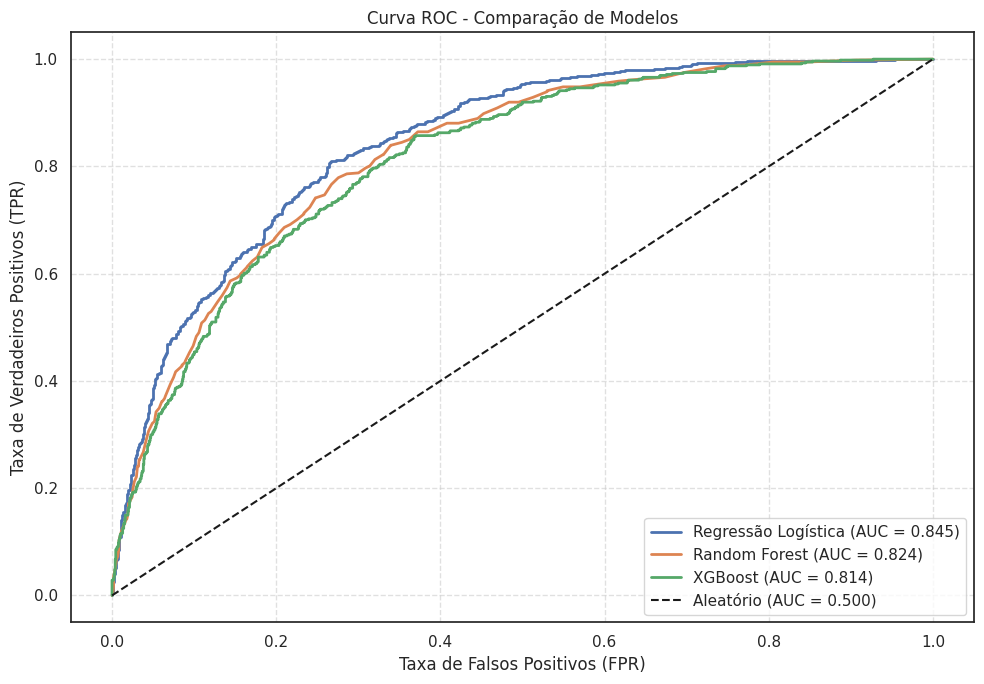
---

## 🎯 Estratégias de Retenção com Base nos Resultados

A partir dos fatores identificados, propõem-se as seguintes estratégias para mitigar a evasão:

1. **Incentivar contratos de longo prazo**  
   Oferecer benefícios exclusivos para clientes que migram para planos de dois anos, como descontos progressivos, bônus de fidelidade ou upgrades de serviço.

2. **Revisar a política de cobrança**  
   Implementar ações de transparência e personalização, como alertas proativos, simulações de consumo e flexibilização de pagamento para clientes com cobranças elevadas.

3. **Monitorar clientes com débito eletrônico**  
   Criar campanhas de engajamento específicas para esse grupo, com foco em relacionamento e valorização da experiência, reduzindo o risco de desligamento silencioso.

4. **Aprimorar a experiência com fibra óptica**  
   Investir em atendimento técnico mais ágil, canais de suporte dedicados e pesquisas de satisfação, garantindo que a percepção de qualidade acompanhe o investimento.

5. **Segmentar ações com base no tempo de contrato**  
   Clientes com menos tempo de vínculo devem receber comunicações personalizadas, ofertas de retenção e acompanhamento mais próximo nos primeiros meses.

---

## ✅ Recomendação Final

Considerando os resultados obtidos, especialmente nas métricas **Recall** e **AUC**, a **Regressão Logística** se destaca como o modelo mais adequado para antecipar a evasão de clientes. Ela oferece:

- Alta sensibilidade para detectar clientes em risco
- Excelente capacidade de separação entre classes
- Interpretação clara dos fatores que influenciam o churn

Além disso, por ser um modelo mais simples e transparente, facilita a comunicação com áreas de negócio e a tomada de decisão baseada em dados. Sua adoção como modelo principal é recomendada para orientar ações estratégicas de retenção na Telecom X.

---
